In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#https://www.kaggle.com/c/digit-recognizer/

In [3]:
data_dir='./'
def load_data(data_dir, train_row):
    train = pd.read_csv('/Users/xiangliu/Desktop/AI/Week2/digit-recognizer/train.csv')
    X_train = train.values[:train_row,1:] #pixel0-pixel 783
    y_train = train.values[:train_row,0]
    
    Pred_test = pd.read_csv('/Users/xiangliu/Desktop/AI/Week2/digit-recognizer/test.csv').values
    Pred_test = Pred_test[:train_row]
    return X_train, y_train, Pred_test

train_row = 5000
Origin_X_train, Origin_y_train, Origin_X_test = load_data(data_dir, train_row) 

In [4]:
print(Origin_X_train.shape, Origin_y_train.shape, Origin_X_test.shape)

(5000, 784) (5000,) (5000, 784)


In [5]:
print(Origin_X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


4


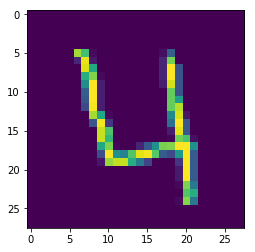

In [6]:
#用图像展示一下数据集
import matplotlib
row  = 3
print(Origin_y_train[3])
plt.imshow(Origin_X_train[row].reshape((28,28)))
plt.show()

4


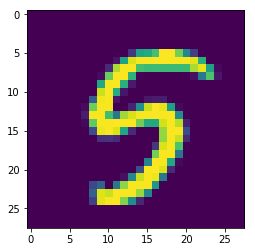

In [7]:
import matplotlib
row  = 8
print(Origin_y_train[3])
plt.imshow(Origin_X_train[row].reshape((28,28)))
plt.show()

4


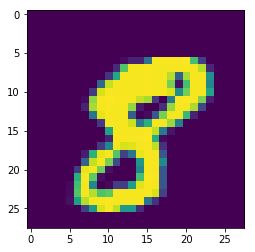

In [8]:
import matplotlib
row  = 10
print(Origin_y_train[3])
plt.imshow(Origin_X_train[row].reshape((28,28)))
plt.show()

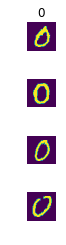

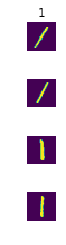

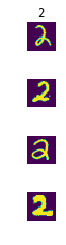

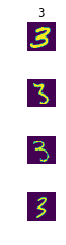

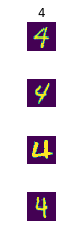

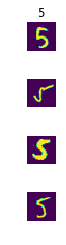

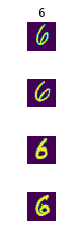

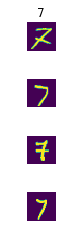

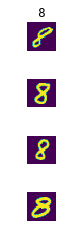

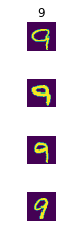

In [9]:
classes = ['0','1','2','3','4','5','6','7','8','9']
row = 4
for y,cls in enumerate(classes):
    idxs = np.nonzero([i==y for i in Origin_y_train])
    idxs = np.random.choice(idxs[0], row) #randomly select "rows" value
    for i, idx in enumerate(idxs):
        plt_idx = i * len(classes) + y + 1
        plt.subplot(row,len(classes), plt_idx)
        plt.imshow(Origin_X_train[idx].reshape((28,28)))
        plt.axis('off')
        if i ==0:
            plt.title(cls)
    plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_vali, y_train, y_vali = train_test_split(Origin_X_train, Origin_y_train, test_size=0.2, random_state = 0)
print(X_train.shape, X_vali.shape, y_train.shape, y_vali.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


In [11]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [12]:
ans_k = 0
k_range = range(1,8)
scores = []

for k in k_range:
    print('k=', k, 'begin')
    start = time.time()
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_vali)
    accuracy = accuracy_score(y_vali, y_pred)
    scores.append(accuracy)
    end = time.time()
    print(classification_report(y_vali, y_pred))
    print(confusion_matrix(y_vali,y_pred))
    print('Complete time:', end-start, 'seconds.')

k= 1 begin
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.90      0.98      0.94       100
           2       0.97      0.88      0.92       104
           3       0.89      0.93      0.91       100
           4       0.93      0.93      0.93       107
           5       0.95      0.88      0.92        94
           6       0.93      0.97      0.95        93
           7       0.92      0.94      0.93       116
           8       0.89      0.85      0.87        85
           9       0.85      0.85      0.85        98

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

[[101   0   0   1   0   0   1   0   0   0]
 [  0  98   0   1   0   0   0   0   0   1]
 [  0   1  91   2   2   0   1   2   3   2]
 [  0   0   1  93   0   1   0   1   3   1]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   2   1  

In [13]:
print(scores)

[0.919, 0.906, 0.92, 0.915, 0.915, 0.914, 0.915]


In [14]:
print(k_range)

range(1, 8)


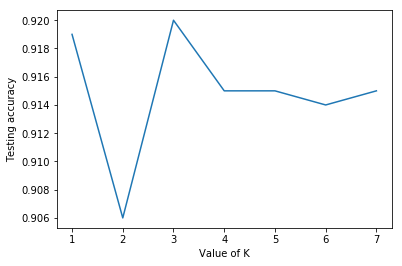

In [15]:
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing accuracy')
plt.show()

In [18]:
#预测测试数据集结果
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Origin_X_train, Origin_y_train)
# A[:row, :col] 取数组左闭右开
# A[x, y]取数组某个元素
y_pred = knn.predict(Origin_X_test[:300])
y_pred

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1,
       1, 5, 7, 4, 2, 7, 7, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9,
       8, 7, 8, 2, 6, 1, 6, 8, 8, 3, 8, 2, 1, 2, 1, 0, 9, 1, 7, 0, 0, 0,
       1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 3, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3,
       6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 8, 2, 0, 7, 3, 0, 5, 0, 9,
       0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 1, 4, 3, 5,
       6, 0, 0, 0, 3, 1, 5, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6,
       5, 3, 7, 5, 7, 8, 3, 0, 4, 5, 1, 2, 7, 6, 3, 0, 2, 7, 9, 6, 1, 3,
       7, 2, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7,
       6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 9, 2, 1, 6, 3, 4,
       2, 3, 1, 0, 2, 0, 4, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6,
       2, 2, 5, 5, 9, 8, 3, 4, 9, 7, 1, 3, 8, 4, 5, 1, 4, 3, 6, 3, 3, 5,
       7, 0, 6, 8, 6, 1, 6, 0, 6, 3, 9, 5, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3,
       7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3])

3


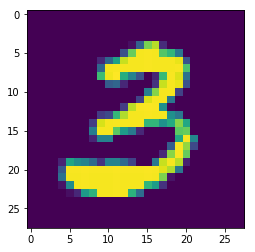

In [23]:
print(y_pred[299])
plt.imshow(Origin_X_test[299].reshape((28,28)))
plt.show()
## is 3 correct

In [30]:
pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label':y_pred}).to_csv('/Users/xiangliu/Desktop/AI/Week2/digit-recognizer/Result.csv', index=False, header=True)

In [26]:
###print label inside
pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label':y_pred})

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
